In [76]:
# para clusterizar
from sklearn.mixture import GaussianMixture

# para tablas
import pandas as pd

# para manipular vectores
import numpy as np

# para visualizar
import matplotlib.pyplot as plt

In [77]:
# carto tabla con convencionales, sus coaliciones, y sus coordenadas de nominate
df_nominate = pd.read_csv('df_nominate.csv', encoding = 'latin1')
df_nominate = df_nominate.dropna()
df_nominate.head()

,names,party,x,y
0,"abarca, damaris",Apruebo Dignidad,0.032137,-0.999484
1,"abarca, jorge",Lista del Apruebo,0.123266,-0.082134
2,"achurra, ignacio",Apruebo Dignidad,0.030095,-0.999547
3,"aguilera, tiare",Pueblos Originarios,-0.309697,-0.017453
4,"alvarado, gloria",Lista del Pueblo,-0.251286,0.634672


In [86]:
# clusterizo los convencionales según posición ideológica
columns = ['x', 'y']
points = df_nominate[columns].to_numpy()
gmm = GaussianMixture(n_components = 4, covariance_type = 'full').fit(points)
labels = gmm.predict(points)

df_nominate['cluster'] = labels
df_nominate.head(3)

,names,party,x,y,cluster,colors_party,colors_cluster
0,"abarca, damaris",Apruebo Dignidad,0.032137,-0.999484,2,#ff7f00,#377eb8
1,"abarca, jorge",Lista del Apruebo,0.123266,-0.082134,0,#4daf4a,#4daf4a
2,"achurra, ignacio",Apruebo Dignidad,0.030095,-0.999547,2,#ff7f00,#377eb8


In [87]:
# definimos paleta (Set1)
import matplotlib.colors as cl

# colorear por coalición
colors_party = [plt.cm.Set1(i) for i in range(len(set(df_nominate.party)))]
colors_party = [cl.to_hex(c) for c in colors_party]
colors_party = dict(zip(set(df_nominate.party), set(colors_party)))
df_nominate['colors_party'] = df_nominate['party'].map(colors_party)

# colorear por cluster GMM
colors_cluster = [plt.cm.Set1(i) for i in range(len(set(labels)))]
colors_cluster = [cl.to_hex(c) for c in colors_cluster]
colors_cluster = dict(zip(set(labels), set(colors_cluster)))
df_nominate['colors_cluster'] = df_nominate['cluster'].map(colors_cluster)
df_nominate.head(3)

,names,party,x,y,cluster,colors_party,colors_cluster
0,"abarca, damaris",Apruebo Dignidad,0.032137,-0.999484,2,#ff7f00,#984ea3
1,"abarca, jorge",Lista del Apruebo,0.123266,-0.082134,0,#4daf4a,#e41a1c
2,"achurra, ignacio",Apruebo Dignidad,0.030095,-0.999547,2,#ff7f00,#984ea3


In [88]:
# Función para graficar elipses en torno a clusters
# Sacado de https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

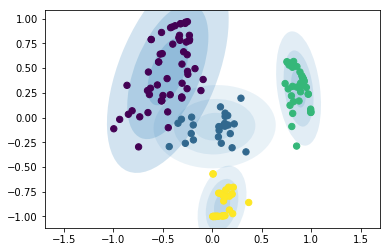

In [89]:
# graficamos con elipses y coloreado por cluster GMM
plot_gmm(gmm, points)
plt.savefig('2d_por_cluster.png')

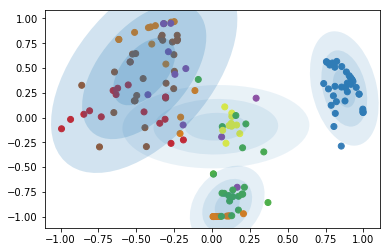

In [90]:
# graficamos con elipses y coloreado por cluster coalición
plt.scatter(df_nominate.x.to_numpy(), df_nominate.y.to_numpy(), c = df_nominate.colors_party)
w_factor = 0.2 / gmm.weights_.max()

for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
plt.savefig('2d_por_coalicion.png')